## Eigenvalues and Eigenvectors with PSD matrices
We will explore the explore the relationship between PSD matrices and its interaction on its eigenvectors as well as non-eigenvectors

In [1]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np

Let us consider a positive semi definite matrix $$A = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}$$
We will compute their eigenvalues and corresponding eigenvectors.

In [2]:
A = np.array([[2,0],[0,3]])
eigenvalues, eigenvectors =  LA.eig(A)
print('lambda_1: {}, v_1: {}'.format(eigenvalues[0], eigenvectors[:, 0]))
print('lambda_2: {}, v_2: {}'.format(eigenvalues[1], eigenvectors[:, 1]))

lambda_1: 2.0, v_1: [1. 0.]
lambda_2: 3.0, v_2: [0. 1.]


To show that these eigenvectors are orthogonal, we will compute their dot product to show that!

In [3]:
np.dot(eigenvectors[:, 0], eigenvectors[:, 1])

0.0

In [4]:
#Defining our plotting function
def plot(x_comp, y_comp, colors, x_lim, y_lim, x_label, y_label, title, labels, offsets={}):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    origins = [0 for i in range(len(x_comp))]
    ax.quiver(origins, origins, x_comp, y_comp, color=colors, angles='xy', scale_units='xy', scale=1)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_aspect('equal')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    if len(labels) != len(colors):
        raise ValueError('len(labels) {} should equal len(colors) {}'.format(len(labels), len(colors)))
    for i, label in enumerate(labels):
        if i in offsets:
            plt.text(x_comp[i] + offsets[i][0], y_comp[i] + offsets[i][1], label, fontsize=20)
        else:
            plt.text(x_comp[i], y_comp[i], label, fontsize=20)
    
    plt.draw()
    plt.show()

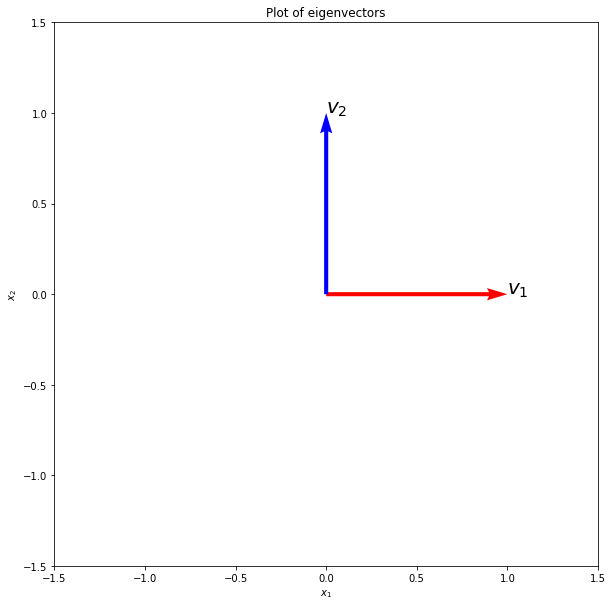

In [5]:
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]
labels = ['$v_1$', '$v_2$']
plot(x_comp, y_comp, ['r','b'], [-1.5,1.5], [-1.5,1.5], '$x_1$', '$x_2$', 'Plot of eigenvectors', labels)

Since we know the vectors are orthogonal, we will now explore their effect on PSD matrix A

Note that in the above example, the blue vector corresponds to $$\begin{bmatrix}0 && 1\end{bmatrix}^T$$ with $\lambda = 3.0$, and the red vector corresponds to $$\begin{bmatrix}1 && 0\end{bmatrix}^T$$ with eigenvalue of $\lambda = 2.0$. Notice how geometrically we can see that they are orthonogonal with each other.

Let us see, geometrically, what happens when we multiply the eigenvectors of A with A.

[1. 0. 2. 0.]


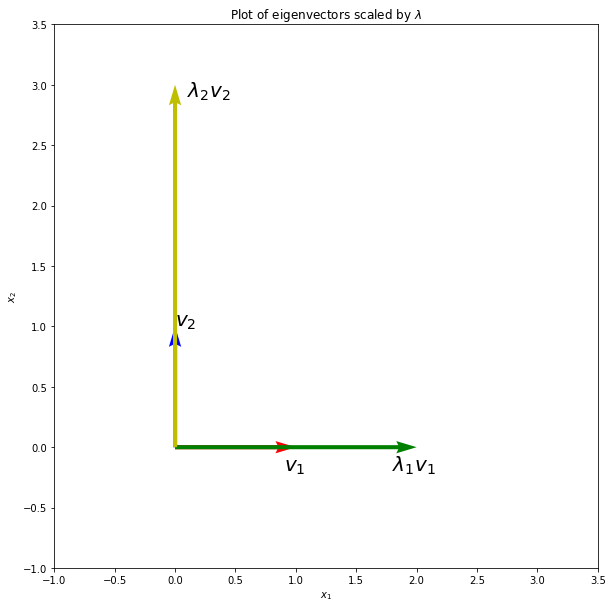

In [6]:
transformed_vectors = np.array([np.dot(A, eigenvectors[:, 0]), np.dot(A, eigenvectors[:, 1])])
x_comp = np.append(eigenvectors[0, :], transformed_vectors[:, 0])
y_comp = np.append(eigenvectors[1, :], transformed_vectors[:, 1])
print(x_comp)
labels += ['$\lambda_1 v_1$', '$\lambda_2 v_2$']
offsets = {0: (-0.1,-0.2), 2: (-0.2, -0.2), 3: (0.1, -0.1)}
plot(x_comp, y_comp, ['r','b','g','y'], [-1, 3.5], [-1, 3.5], '$x_1$', '$x_2$', 'Plot of eigenvectors scaled by $\lambda$', labels, offsets)

To interpret this plot, we will use this equation to explain the observation. 

$$Ax = \lambda x$$

Let us start with the red arrow, which is the same arrow from the previous plot. This corresponds to the eigenvector 

$$\begin{bmatrix}1 && 0\end{bmatrix}^T$$

We will denote this vector as $V_1$ and its corresponding $\lambda_1$ to be the eigenvalue of that vector. Note that the operation $Ax$ resulted in the green arrow, which is the same as $ 2 * V_1 $.

Similarly, for the yellow arrow which is denoted by the eigenvector 

$$\begin{bmatrix}0 && 1\end{bmatrix}^T$$

it was "stretched" by a factor which is equivalent to its eigenvalue of 3

However, we must note that eigenvectors are special vectors that only gets stretched when transformed by A, there are many more vectors that do not have the same effect as the eigenvectors. We will use 

$$z = \begin{bmatrix}0.987 && 0.665\end{bmatrix}^T$$

to demonstrate our point.

z_trans [1.974 1.995]


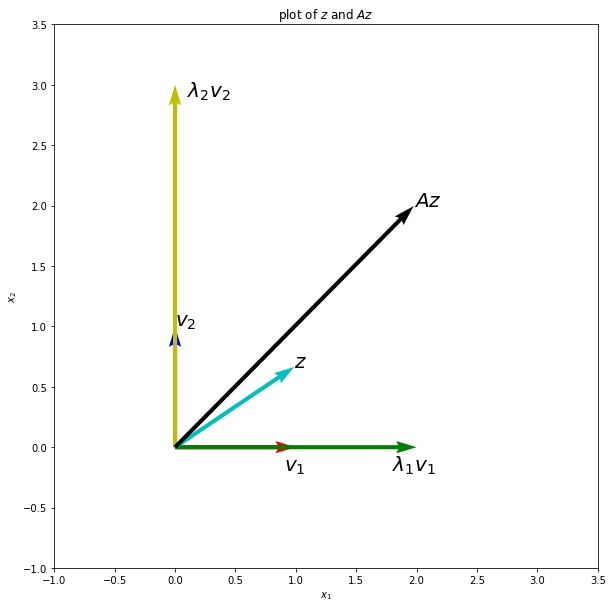

In [7]:
z = np.array([0.987, 0.665])
x_comp = np.append(x_comp, z[0])
y_comp = np.append(y_comp, z[1])
z_trans = np.dot(A, z)
print('z_trans', z_trans)
x_comp = np.append(x_comp, z_trans[0])
y_comp = np.append(y_comp, z_trans[1])
labels += ['$z$', '$Az$']
plot(x_comp, y_comp, ['r','b','g','y','c','k'], [-1,3.5], [-1,3.5], '$x_1$', '$x_2$', 'plot of $z$ and $Az$', labels, offsets)

As we can see here, the cyan vector was $\begin{bmatrix}0.987 && 0.665\end{bmatrix}^T$, and the black vector was the cyan vector after transformation by the matrix A. 

### Interaction between eigenbasis and the non-eigenvectors component
Now we will project the cyan vector down into the eigenbases, ie: the red and blue vector and see the transformation/"stretches" of the projected vector by PSD matrix A, and then reform the the black vector from the addition of those components. We know that in this case the projection of the cyan vector onto the component of the green eigenbasis is the same as projecting to the x-axis, and similarly with the y-component to the y-axis.

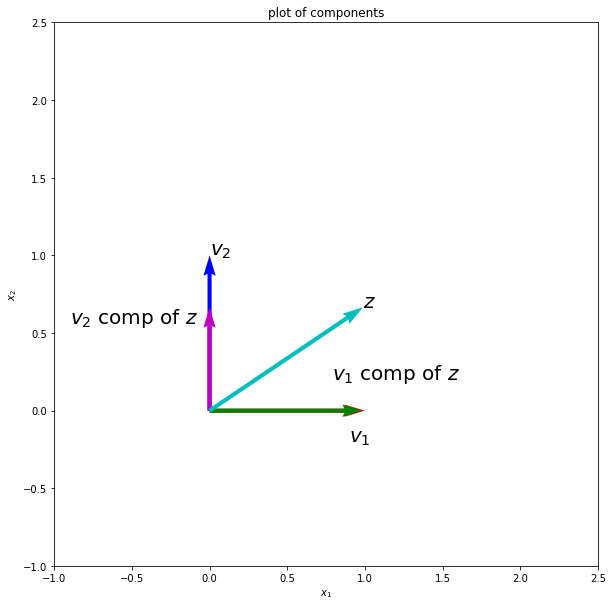

In [8]:
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]

z_transX = np.array([z[0], 0])
z_transY = np.array([0, z[1]])

x_comp = np.append(x_comp, z_transX[0])
x_comp = np.append(x_comp, z_transY[0])
y_comp = np.append(y_comp, z_transX[1])
y_comp = np.append(y_comp, z_transY[1])
x_comp = np.append(x_comp, z[0])
y_comp = np.append(y_comp, z[1])

labels = ['$v_1$', '$v_2$', '$v_1$ comp of $z$', '$v_2$ comp of $z$', '$z$']
offsets = {0: (-0.1, -0.2), 2: (-0.2, 0.2), 3: (-0.9, -0.1)}

plot(x_comp, y_comp, ['r','b','g','m', 'c'], [-1,2.5], [-1,2.5], '$x_1$', '$x_2$', 'plot of components', labels, offsets)

Now, we will see the scaling of the projected components of the cyan vector by let it be transformed by the PSD matrix, and note that this is equivalent ot scaling the components of the cyan vector since $$Ax = \lambda x$$, and now the components which was projected down into the eigenbasis now is in the span of the eigenbasis. Therefore, we know for the green component vector, which corresponds to the eigenvalue of 2 and the magenta vector which corresponds to the eigen value of 3. We will now show the scaling on a plot.

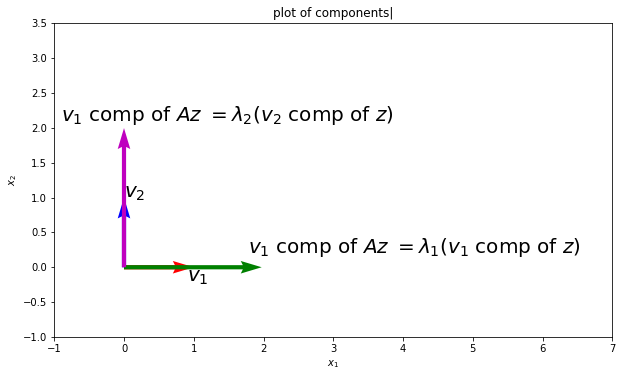

In [9]:
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]

z_transX = z_transX * 2.0 # Scaling since Ax = lx
z_transY = z_transY * 3.0 # Scaling since Ax = lx

x_comp = np.append(x_comp, z_transX[0])
x_comp = np.append(x_comp, z_transY[0])
y_comp = np.append(y_comp, z_transX[1])
y_comp = np.append(y_comp, z_transY[1])

labels = ['$v_1$', '$v_2$', '$v_1$ comp of $Az$ $= \lambda_1$($v_1$ comp of $z$)', '$v_1$ comp of $Az$ $= \lambda_2$($v_2$ comp of $z$)']
offsets = {0: (-0.1, -0.2), 2: (-0.2, 0.2), 3: (-0.9, 0.1)}
plot(x_comp, y_comp, ['r','b','g','m'], [-1, 7], [-1, 3.5], '$x_1$', '$x_2$', 'plot of components|', labels, offsets)

The plot shown above is after scaling the green and magenta component vectors. Now we will attempt to reconstruct the black vector from 3 plots ago, by summing the green and magenta vector together.

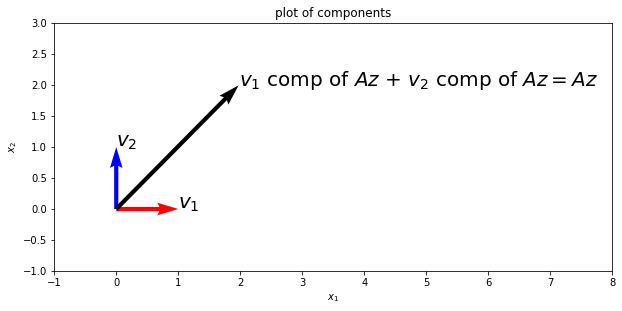

In [10]:
black_vec = z_transX + z_transY
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]
x_comp = np.append(x_comp, black_vec[0])
y_comp = np.append(y_comp, black_vec[1])
labels = ['$v_1$', '$v_2$', '$v_1$ comp of $Az$ + $v_2$ comp of $Az = Az$']
offsets = {}
plot(x_comp, y_comp, ['r','b','k'], [-1, 8], [-1, 3], '$x_1$', '$x_2$', 'plot of components', labels, offsets)

Note that this black vector is exactly the same as the black vector 3 plots ago!

## Conclusion
From the example shown, we can see why positive semi definite matrix is important. We need the property of positive eigen values so that we can project a vector into our eigenbasis and reconstruct the vector again by streching the projected component!

## Another example: Non-trivial eigenbasis

Let us consider another PSD matrix B. $$B = \begin{bmatrix}4 && -1 \\ -1 && 4\end{bmatrix}$$

In [11]:
B = np.array([[4, -1], [-1, 4]])
eigenvalues, eigenvectors =  LA.eig(B)
print('lambda_1: {}, v_1: {}'.format(eigenvalues[0], eigenvectors[:, 0]))
print('lambda_2: {}, v_2: {}'.format(eigenvalues[1], eigenvectors[:, 1]))

lambda_1: 5.0, v_1: [ 0.70710678 -0.70710678]
lambda_2: 3.0, v_2: [0.70710678 0.70710678]


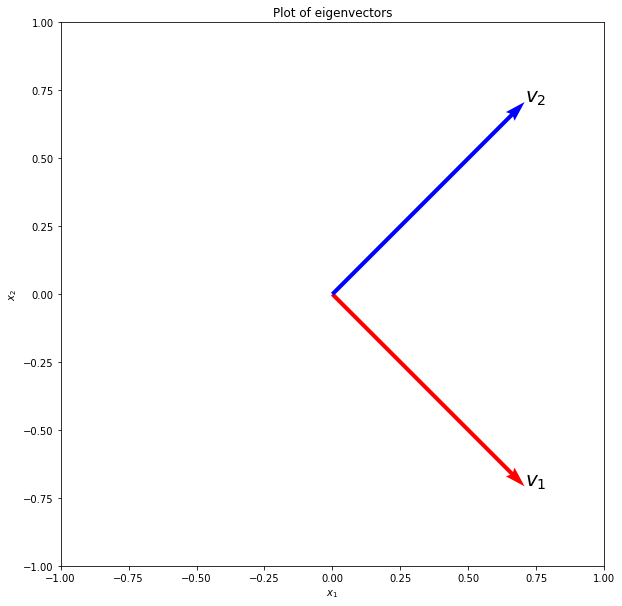

In [12]:
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]
labels = ['$v_1$', '$v_2$']
plot(x_comp, y_comp, ['r','b'], [-1,1], [-1,1], '$x_1$', '$x_2$', 'Plot of eigenvectors', labels, offsets)

In [13]:
np.dot(eigenvectors[:, 0], eigenvectors[:, 1]) # Showing that the eigenvectors are in fact orthogonal

0.0

In [14]:
# Project vector u to vector v, we assume that the v is unit vector
def project(u, v):
    return np.dot(u, v) * v / np.linalg.norm(v)**2

We will use vector $$z = \begin{bmatrix}1 && 0\end{bmatrix}^T$$ as an example. Projecting it to the eigenbasis yield us

[[ 0.5 -0.5]
 [ 0.5  0.5]]
[0.70710678 0.70710678 0.5        0.5        1.        ]


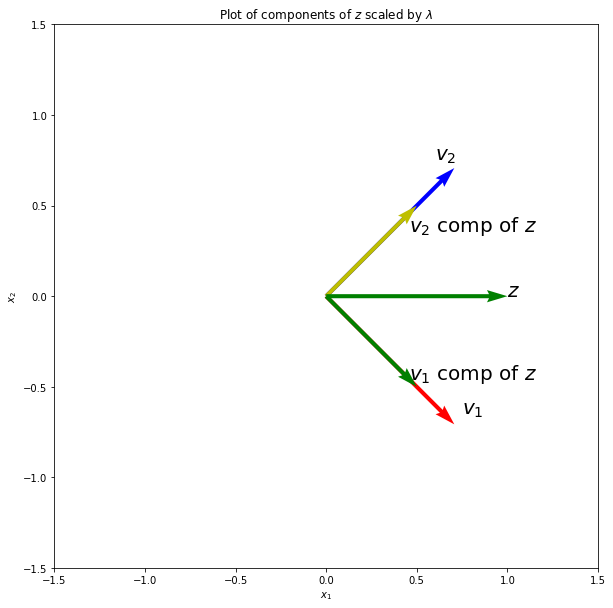

In [15]:
z = np.array([1, 0])
transformed_vectors = np.array([project(z, eigenvectors[:, 0]), project(z, eigenvectors[:, 1])])
print(transformed_vectors)
x_comp = np.append(eigenvectors[0, :], transformed_vectors[:, 0])
y_comp = np.append(eigenvectors[1, :], transformed_vectors[:, 1])
x_comp = np.append(x_comp, z[0])
y_comp = np.append(y_comp, z[1])
print(x_comp)
# plot(x_comp, y_comp, ['r','b','g','y','k'], [-1.5, 1.5], [-1.5, 1.5])

labels = ['$v_1$ comp of $z$', '$v_2$ comp of $z$', '$v_1$', '$v_2$', '$z$']
offsets = {0: (-0.25, 0.25), 1: (-0.25, -0.35), 2: (0.25, -0.15), 3: (0.1, 0.25)}
plot(x_comp, y_comp, ['r','b','g','y', 'g'], [-1.5, 1.5], [-1.5, 1.5], '$x_1$', '$x_2$', 'Plot of components of $z$ scaled by $\lambda$', labels, offsets)

The yellow and green vectors are the projection of the black vector into the red and blue eigenbasis respectively. Since we can visually see that the projected component lies in the span of the eigenbasis, we can now scale the projected component respectively according to the eigenvalues of the correponding eigenbasis.

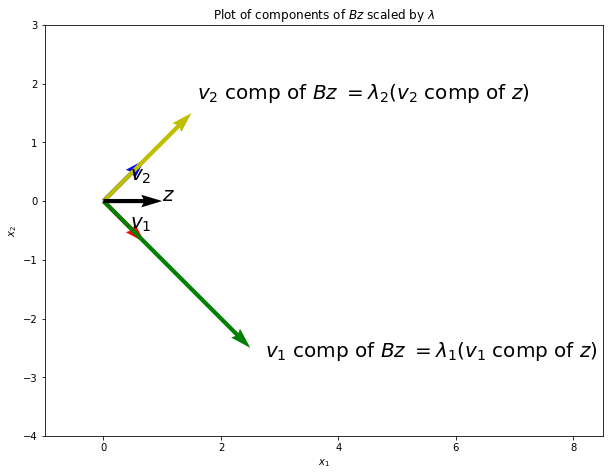

In [16]:
x_comp[2] = x_comp[2] * 5.0
y_comp[2] = y_comp[2] * 5.0
x_comp[3] = x_comp[3] * 3.0
y_comp[3] = y_comp[3] * 3.0
labels = ['$v_1$', '$v_2$', '$v_1$ comp of $Bz$ $= \lambda_1$($v_1$ comp of $z$)', '$v_2$ comp of $Bz$ $= \lambda_2$($v_2$ comp of $z$)', '$z$']
offsets = {0: (-0.25, 0.25), 1: (-0.25, -0.35), 2: (0.25, -0.15), 3: (0.1, 0.25)}
plot(x_comp, y_comp, ['r','b','g','y','k'], [-1, 8.5], [-4, 3], '$x_1$', '$x_2$', 'Plot of components of $Bz$ scaled by $\lambda$', labels, offsets)

Now that we have scaled the vectors, we will reconstruct the black vector as if it was transformed by the PSD matrix B.

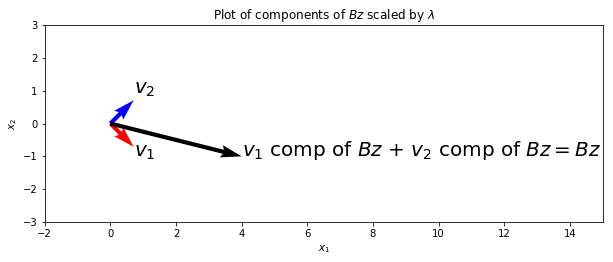

In [17]:
transformed_vec = np.array([x_comp[2] + x_comp[3], y_comp[2] + y_comp[3]])
same_transformed = np.dot(B, z)
x_comp = eigenvectors[0, :]
y_comp = eigenvectors[1, :]
x_comp = np.append(x_comp, transformed_vec[0])
y_comp = np.append(y_comp, transformed_vec[1])
labels = ['$v_1$', '$v_2$', '$v_1$ comp of $Bz$ + $v_2$ comp of $Bz = Bz$']
offsets = {0: (0, -0.3), 1: (0, 0.2)}
plot(x_comp, y_comp, ['r','b','k'], [-2,15], [-3,3], '$x_1$', '$x_2$', 'Plot of components of $Bz$ scaled by $\lambda$', labels, offsets)

In [18]:
# assert that same_transformed and transformed_vec are the same
# Note that the difference is approximately 0!s
print(transformed_vec - same_transformed)

[0. 0.]
